In [ ]:
!pip install torchvision

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torch

In [ ]:
plt.rcParams['figure.figsize'] = 15, 10

In [ ]:
# Initializing the transform for the dataset
transform = torchvision.transforms.Compose([
	torchvision.transforms.ToTensor(),
	torchvision.transforms.Normalize((0.5), (0.5))
])

In [ ]:
# Downloading the MNIST dataset
train_dataset = torchvision.datasets.MNIST(
	root="./MNIST/train",
    train=True,
	transform=torchvision.transforms.ToTensor(),
	download=True
 )

test_dataset = torchvision.datasets.MNIST(
	root="./MNIST/test",
    train=False,
	transform=torchvision.transforms.ToTensor(),
	download=True
 )

In [ ]:
# Creating Dataloaders from the
# training and testing dataset
train_loader = torch.utils.data.DataLoader(
	train_dataset,
    batch_size=512
)
test_loader = torch.utils.data.DataLoader(
	test_dataset,
    batch_size=512
)

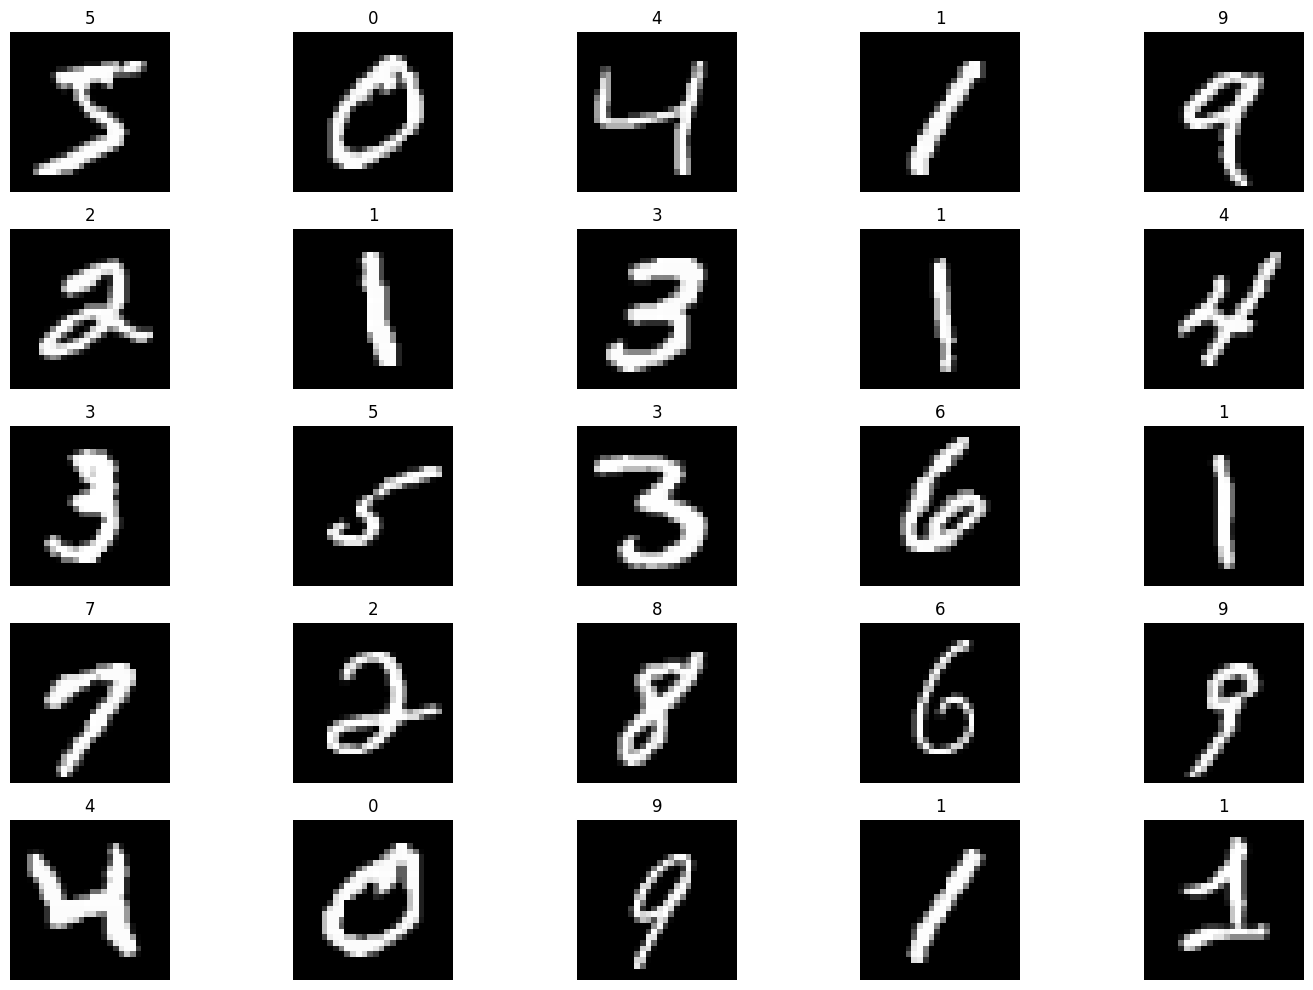

In [ ]:
# Printing 25 random images from the training dataset
random_samples = np.random.randint(
		 1,
		 len(train_dataset),
		 (25)
)

for idx in range(random_samples.shape[0]):
	plt.subplot(5, 5, idx + 1)
	plt.imshow(train_dataset[idx][0][0].numpy(), cmap='gray')
	plt.title(train_dataset[idx][1])
	plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
 # Creating a DeepAutoencoder class
class DeepAutoencoder(torch.nn.Module):
	def __init__(self):
		super().__init__()
		self.encoder = torch.nn.Sequential(
			torch.nn.Linear(28 * 28, 256),
			torch.nn.ReLU(),
			torch.nn.Linear(256, 128),
			torch.nn.ReLU(),
			torch.nn.Linear(128, 64),
			torch.nn.ReLU(),
			torch.nn.Linear(64, 10)
		)

		self.decoder = torch.nn.Sequential(
			torch.nn.Linear(10, 64),
			torch.nn.ReLU(),
			torch.nn.Linear(64, 128),
			torch.nn.ReLU(),
			torch.nn.Linear(128, 256),
			torch.nn.ReLU(),
			torch.nn.Linear(256, 28 * 28),
			torch.nn.Sigmoid()
		)

	def forward(self, x):
		encoded = self.encoder(x)
		decoded = self.decoder(encoded)
		return decoded


In [ ]:
# Instantiating the model and hyperparameters
model = DeepAutoencoder()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

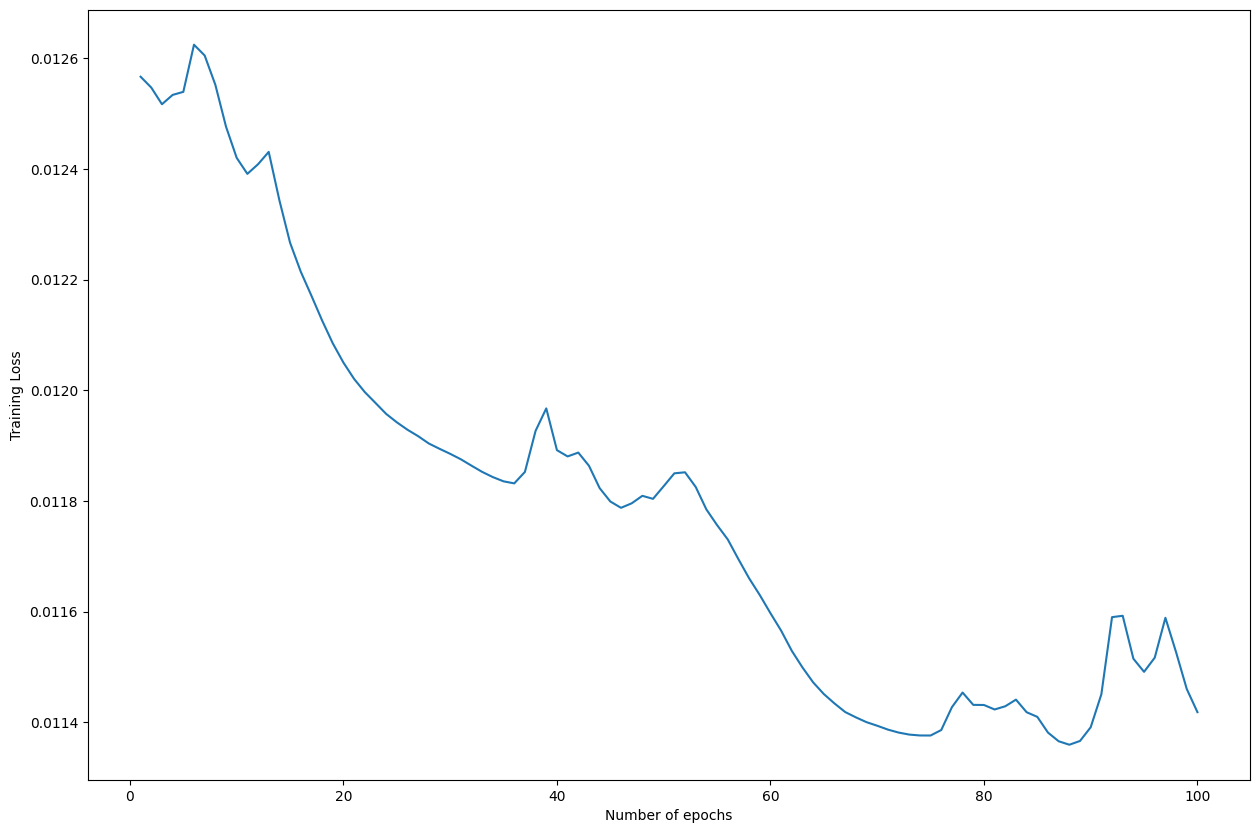

In [ ]:
# List that will store the training loss
train_loss = []

# Dictionary that will store the
# different images and outputs for
# various epochs
outputs = {}

batch_size = len(train_loader)

num_epochs = 100


# Training loop starts
for epoch in range(num_epochs):

	# Initializing variable for storing
	# loss
	running_loss = 0

	# Iterating over the training dataset
	for batch in train_loader:

		# Loading image(s) and
		# reshaping it into a 1-d vector
		img, _ = batch
		img = img.reshape(-1, 28*28)

		# Generating output
		out = model(img)

		# Calculating loss
		loss = criterion(out, img)

		# Updating weights according
		# to the calculated loss
		optimizer.zero_grad()
		loss.backward()
		optimizer.step()

		# Incrementing loss
		running_loss += loss.item()

	# Averaging out loss over entire batch
	running_loss /= batch_size
	train_loss.append(running_loss)

	# Storing useful images and
	# reconstructed outputs for the last batch
	outputs[epoch+1] = {'img': img, 'out': out}


# Plotting the training loss
plt.plot(range(1,num_epochs+1),train_loss)
plt.xlabel("Number of epochs")
plt.ylabel("Training Loss")
plt.show()


<ipython-input-20-21717345ff75>:40: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(7,len(epochs_list),counter)
<ipython-input-20-21717345ff75>:51: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


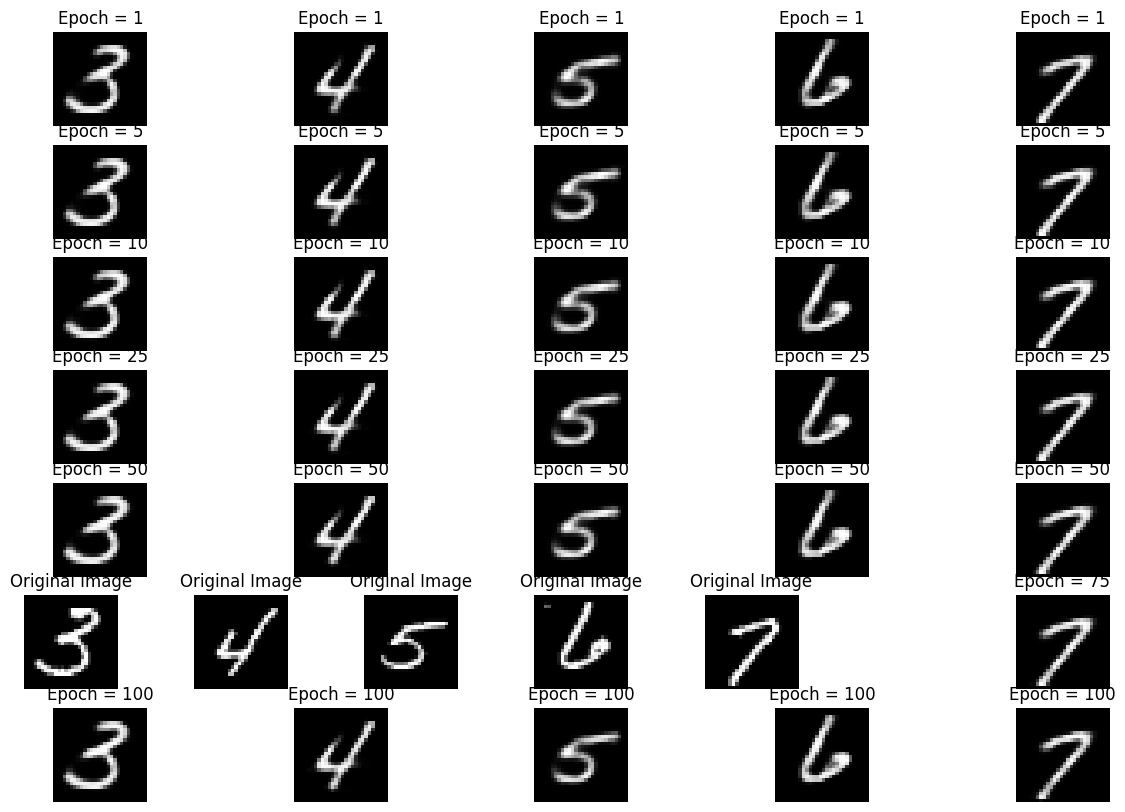

In [ ]:
train_outputs = outputs

# Plotting is done on a 7x5 subplot
# Plotting the reconstructed images

# Initializing subplot counter
counter = 1

# Plotting reconstructions
# for epochs = [1, 5, 10, 50, 100]
epochs_list = [1, 5, 10, 25, 50, 75, 100]

# Iterating over specified epochs
for val in epochs_list:

	# Extracting recorded information
	temp = train_outputs[val]['out'].detach().numpy()
	title_text = f"Epoch = {val}"

	# Plotting first five images of the last batch
	for idx in range(5):
		plt.subplot(7, 5, counter)
		plt.title(title_text)
		plt.imshow(temp[idx].reshape(28,28), cmap= 'gray')
		plt.axis('off')

		# Incrementing the subplot counter
		counter+=1

# Plotting original images

# Iterating over first five
# images of the last batch
# for idx in range(5):

# 	# Obtaining image from the dictionary
# 	val = train_outputs[10]['img']

# 	# Plotting image
# 	plt.subplot(7,len(epochs_list),counter)
# 	plt.imshow(
# 			 val[idx].reshape(28, 28),
# 			cmap = 'gray'
# 		)
# 	plt.title("Original Image")
# 	plt.axis('off')

# 	# Incrementing subplot counter
# 	counter+=1

plt.tight_layout()
plt.show()


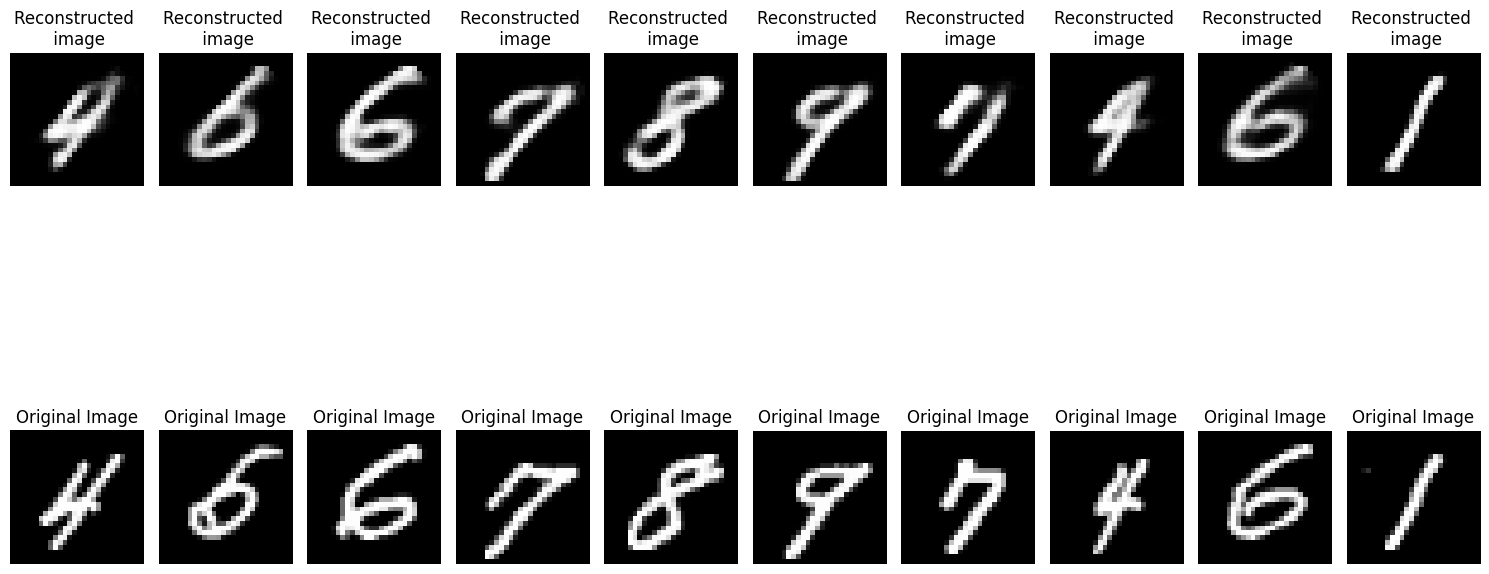

In [ ]:
# Dictionary that will store the different
# images and outputs for various epochs
outputs = {}

# Extracting the last batch from the test
# dataset
img, _ = list(test_loader)[-1]

# Reshaping into 1d vector
img = img.reshape(-1, 28 * 28)

# Generating output for the obtained
# batch
with torch.no_grad():
	out = model(img)

# Storing information in dictionary
outputs['img'] = img
outputs['out'] = out

# Plotting reconstructed images
# Initializing subplot counter
counter = 1
val = outputs['out'].detach().numpy()

# Plotting first 10 images of the batch
for idx in range(10):
	plt.subplot(2, 10, counter)
	plt.title("Reconstructed \n image")
	plt.imshow(val[idx].reshape(28, 28), cmap='gray')
	plt.axis('off')

	# Incrementing subplot counter
	counter += 1

# Plotting original images

# Plotting first 10 images
for idx in range(10):
	val = outputs['img']
	plt.subplot(2, 10, counter)
	plt.imshow(val[idx].reshape(28, 28), cmap='gray')
	plt.title("Original Image")
	plt.axis('off')

	# Incrementing subplot counter
	counter += 1

plt.tight_layout()
plt.show()
